>   Importa as bibliotecas necessárias

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


>   Ler os arquivos CSV em Dataframes do Pandas

In [2]:
df_performance = pd.read_csv('/home/rhudson/Documentos/PUC/Projeto em ciência de dados I/ppl-cd-pcd-sist-int-2024-1-sleepresearch-2024-1/assets/data/Student Stress Factors.csv')  # Ler o arquivo CSV de desempenho dos alunos
df_stress = pd.read_csv('/home/rhudson/Documentos/PUC/Projeto em ciência de dados I/ppl-cd-pcd-sist-int-2024-1-sleepresearch-2024-1/assets/data/Student_Performance.csv')  # Ler o arquivo CSV dos fatores de estresse dos alunos

>   Cria uma nova coluna `Student ID` no `df_performance`, atribuindo um ID inteiro único para cada aluno (de 1 a 10000)

In [3]:
df_performance['Student ID'] = range(1, len(df_performance) + 1)

>   Randomiza 520 linhas do `df_performance` e armazena em `df_performance_sample`.


In [4]:
df_performance_sample = df_performance.sample(n=520, random_state=1)


>   Combina `df_performance_sample` com `df_stress` com base no índice.


In [5]:
df_combined = pd.merge(df_performance_sample, df_stress, left_index=True, right_index=True)

>   Filtra o dataframe combinado `df_combined` para manter apenas as colunas `Sleep Hours`, `Sleep Quality` e `Performance Index`.

In [6]:
df_combined = df_combined[['Sleep Hours', 'Sleep Quality', 'Performance Index']]

>   Separa os recursos (X) e a variável alvo (y) do `df_combined`

In [7]:
X = df_combined.drop('Performance Index', axis=1)
y = df_combined['Performance Index']

>   Divide os dados em conjuntos de treinamento e teste

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

>   Normaliza os recursos usando MinMaxScaler

In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

>   Constrói, compila e treina um modelo de rede neural sequencial

In [11]:
model = Sequential()
model.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))  # Camada de entrada
model.add(Dense(64, activation='relu'))  # Camada oculta
model.add(Dense(1, activation='linear'))  # Camada de saída
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3586.4133 - mean_absolute_error: 56.4656 - val_loss: 3497.7183 - val_mean_absolute_error: 55.3542
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3448.0955 - mean_absolute_error: 55.4256 - val_loss: 3490.8950 - val_mean_absolute_error: 55.2919
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3391.6494 - mean_absolute_error: 55.0300 - val_loss: 3483.5881 - val_mean_absolute_error: 55.2250
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3415.3713 - mean_absolute_error: 55.1545 - val_loss: 3475.6506 - val_mean_absolute_error: 55.1524
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3279.2576 - mean_absolute_error: 54.1978 - val_loss: 3466.6487 - val_mean_absolute_error: 55.0699
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3470.8447 - mean_absolute_error: 55.3235 - val_loss: 3456.4294 - val_mean_absolute_error: 54.9760
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - los

>   Prevê no conjunto de teste e calcula o erro médio absoluto

In [20]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


>   Imprime o MAE

In [21]:
print(f'Erro Médio Absoluto no Conjunto de Teste: {mae:.2f}')

Erro Médio Absoluto no Conjunto de Teste: 17.88


>   Gráfico da perda durante o treinamento

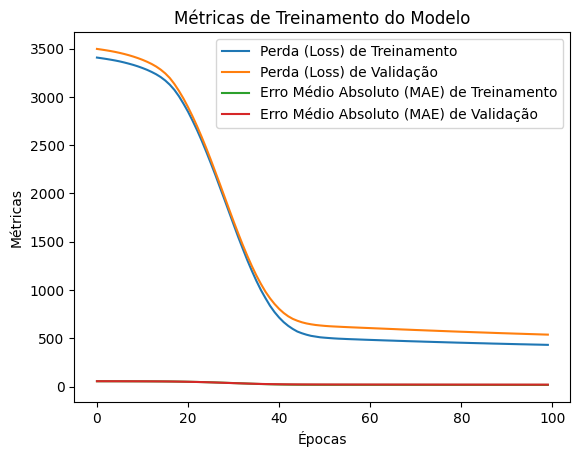

In [24]:
# Plota a perda (loss) e outras métricas
plt.plot(history.history['loss'], label='Perda (Loss) de Treinamento')
plt.plot(history.history['val_loss'], label='Perda (Loss) de Validação')
plt.plot(history.history['mean_absolute_error'], label='Erro Médio Absoluto (MAE) de Treinamento')
plt.plot(history.history['val_mean_absolute_error'], label='Erro Médio Absoluto (MAE) de Validação')
plt.title('Métricas de Treinamento do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Métricas')
plt.legend()
plt.show()